Análise de mudanças climáticas do Azure Notebook

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()


Importar Dados

In [15]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv',delimiter=',', usecols=(0,1),unpack=True)
years,mean= np.loadtxt('5-year-mean-1882-2014.csv',delimiter=',', usecols=(0,1), unpack=True)

Criar gráfico de dispersão


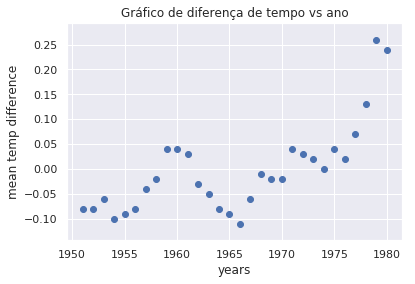

In [16]:
plt.scatter(yearsBase,meanBase) //( x = yearsBase, y= Mean)
plt.title("Gráfico de diferença de tempo vs ano")
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()